##Các bài về Extream machine learning

##Example 2 ( Bài báo Chebyshev )

## ${\bigtriangledown^2u(x,y) = (2-\pi^{2}*y^{2})*sin({\pi}x)}$

với x,y ${\in}$ [0,1]

${u(0,y) =0 }$

${u(1,y) = 0}$

${u(x,0) =  0}$

${d_{/dy}u(x,1) = 2*sin({\pi}x)}$

Nghiêm Trial :

${u_{t}(x,y) = B(x,y) + x(1-x)y[ N(x,y,p) - N(x,1,p) - d_{/dy}N(x,1,p) ]  = y*2*sin({\pi}x) + x(1-x)y[ N(x,y,p) - N(x,1,p) - d_{/dy}N(x,1,p) ] }$



${Với\  f_{0}(y) = 0}$

${Với\  f_{1}(y) = 0}$

${Với\  g_{0}(x) = 0}$

${Với \ g_{1}(x) = 2*sin({\pi}x)}$

${B(x,y) = (1-x)f_{0}(y) + xf_{1}(y) + g_{0}(x) - [(1-x)g_{0}(0) + xg_{0}(1)] + y\{g_{1}(x) - [(1-x)g_{1}(0) + xg_{1}(1)]\} }$


= > ${B(x,y) = y*2*sin({\pi}x) }$

Nghiệm giải tích
${u_{a}(x,y) = y^{2}sin({\pi}x)}$

PROBLEM #6   (sách trên)

### Ý tưởng

Xét trường hợp ANN với x ${\in\ R^2}, out \in R$

Gọi W là bộ tham số đầu vào của ANN 1 tầng ẩn với N nodes , W được khởi tạo ngẫu nhiên và giữ cố định

${\beta = (\beta_{1},\beta_{2},...,\beta_{N})}$ là bộ tham số đầu ra  ( mảng 1 chiều N phần tử ) 

Extream không lan truyền ngược để tìm bộ ${\beta}$  tối ưu mà giải 1 hệ phương trình tuyến tính thiết lập từ các giá trị nghiệm đã biết để tìm ${\beta}$

Rời rạc hóa Domain :

    xs = np.linspace(0,1,nx)
    ys = np.linspace(0,1,ny)

Đặt X, Y = np.meshgrid(xs,ys)

Gọi D = ${ \{x_{i}\}
\ = \{ (X[i],Y[i]) \},\  i : 0  \to  N_{D}-1 = nx*ny-1 }$


Nghiệm Thử : 

${ \ (yTrial(x,y) =)\  u_{t}(x,y)=y∗2∗sin(πx)+x(1−x)y[N(x,y,p)−N(x,1,p)−d_{/dy}N(x,1,p)]}$


Với mỗi ${x_{i} \in D\  ta\  tính\  được\  N(x_{i}[0],x_{i}[1],\ \beta), N(x_{i}[0],1,\ \beta), d_{/dy}N(x_{i}[0],1,\beta)]  }$

${ \to\ tính\ được\ yTrial(x_{i}[0],x_{i}[1],\ \beta)}$

Lần lượt thế vào phương trình :

${\bigtriangledown^2u(x,y) = (2-\pi^{2}*y^{2})*sin({\pi}x)}$      (1)

ta có được 1 hệ ${N_{D}}$ phương trình với N ẩn ${\beta = (\beta_{1},\beta_{2},...,\beta_{N})}$

chọn N = ${N_{D}}$

Giải hệ phương trình trên tìm được bộ tham số ${\beta}$ tối ưu
    
    
Vấn đề : Hệ phương trình (1) chứa các biến ${\beta_{i}}$, làm sao chuyển về dạng H${\beta}$ = T để giải

##Cách tìm ma trận H 

${\frac{\delta^{2}u}{\delta x^{2}} + \frac{\delta^{2}u}{\delta y^{2}} = f(x)} (1)$

${\frac{\delta^{2}u}{\delta x^{2}} = \sum a_{i}\beta_{i} + a_{0}}\  (2)$

${\frac{\delta^{2}u}{\delta y^{2}} = \sum b_{i}\beta_{i} + b_{0}\ (3)}$

${(1) \to  \sum (a_{i} + b_{i})\beta_{i } = f(x) - a_{0} - b_{0}}$

${t_{i} = f(x) - a_{0} - b_{0}}$

${(a_{0},a_{1}, ... , a_{N\_hides}) = jacobian(\frac{\delta^{2}u}{\delta x^{2}})\ theo\ \beta}$

${(b_{0},b_{1}, ... , b_{N\_hides}) = jacobian(\frac{\delta^{2}u}{\delta y^{2}})\ theo\ \beta}$

Để  tìm ${ a_{0}\ trong\ (2)\ ta\ cho\ \beta_{i} = 0, \forall i }$

Để  tìm ${ b_{0}\ trong\ (3)\ ta\ cho\ \beta_{i} = 0, \forall i }$

${\to}$ H = ${[a_{ji} + b_{ji}]_{NxN\_hides}}$

với N : số input,  N_hides : số nodes ẩn

T = ${[t_{i}]\, i : 0\to N\_hides - 1}$

### Thư viện

In [0]:
!pip install autograd
import autograd
import autograd.numpy as np
from autograd import grad, jacobian, hessian
from autograd import elementwise_grad as egrad

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

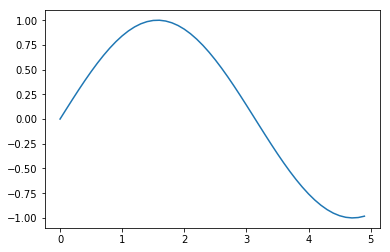

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)

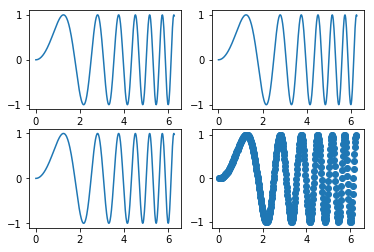

In [0]:
# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, y)
axes[0, 1].plot(x, y)
axes[1, 0].plot(x, y)
axes[1, 1].scatter(x, y)

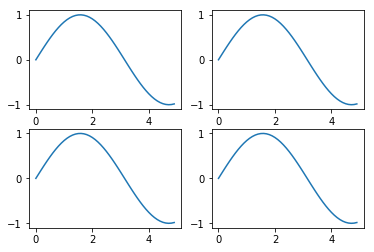

In [0]:
plt.figure()
plt.subplot(221)
plt.plot(x, y)
plt.subplot(222)
plt.plot(x, y)
plt.subplot(223)
plt.plot(x, y)
plt.subplot(224)
plt.plot(x, y)

### Khai báo Hàm

In [0]:

# ------------------- Ham ------------------
def sigmoid(x):
    return 1./(1+np.exp(-x))

def f(x):
    pi2 = np.pi**2
    return (2-pi2*x[1]**2)*np.sin(np.pi*x[0])

def B(x):
    return 2*x[1]*np.sin(np.pi*x[0])

def network_netout(x,W,beta):    # x la vector [x1,x2]
    wt = sigmoid(np.add(np.dot(x,W),bias) )
    return ((np.dot(wt,beta)))

def d_network_netout(x,W,beta):
    return jacobian(network_netout,0)  # Trả về vector đạo Hàm riêng theo vector x

def network_netout_1(x,W,beta):  
    xt = np.array([x[0],1])
    return network_netout(xt,W,beta)   

def d_network_netout_y(x,W,beta):  
    xt = np.array([x[0],1])                                # cho y = 1
    d_net_1 = jacobian(network_netout,0)
    return  d_net_1(xt,W,beta)

def yTrial(x,W,beta):
    net_out = network_netout(x,W,beta)
    net_out_1 = network_netout_1(x,W,beta)
    d_net_out_y = d_network_netout_y(x,W,beta)[1]
    return B(x) + x[0]*(1-x[0])*x[1]*( net_out - net_out_1 - d_net_out_y )

def solution(x):
	return np.sin(np.pi*x[0])*x[1]**2



# ------------------- Ham ------------------

### Huấn luyện

In [0]:
# Rời rạc hóa Domain

nx = 11
ny = 11

n = 2        # input thuoc R^2
m = 1        # output thuoc R  

xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)
X, Y = np.meshgrid(xs,ys)

D = []       # Tập điểm huấn luyện

for i in range(nx):
    for j in range(ny):
        x = np.array([ X[i][j],Y[i][j] ])
        D.append(x)
  
D = np.array(D) 
print('----Tap huan luyen D ---------')
#print(D)
print('------------------------------')
# Tham số ANN
N_hides = D.shape[0]                    # số node ẩn = số tham số (các biến của Hệ Ptr) cần tìm = số điểm trong tập huấn luyện
W = np.random.rand(n,N_hides)           # tham số input --> hidden layer 
beta = np.random.rand(N_hides)          # tham số hidden layer --> output,cần tìm
#beta = np.zeros(N_hides)
bias = np.random.rand(N_hides)
#bias = np.zeros(N_hides)

# Xây dựng các Ma trận cho Hệ Phương trình


H = []
T = []

for i,x in enumerate(D):
        
    h_yTrial = hessian(yTrial,0)          # Hàm tạo Ma trận Hessian (2,2)
    
    d_beta_x = jacobian(h_yTrial,2)  
    #print(d_beta_x(x,W,beta).shape)      # (2,2,N_hides), chiều thử 3 là các đạo hàm riêng theo các beta_i
    
    pBetaX0 = d_beta_x(x,W,beta)[0][0]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx0^2
    #print(pBetaX0)
     
    pBetaX1 = d_beta_x(x,W,beta)[1][1]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx1^2
    #print(pBetaX1)
    
    pBeta = np.add(pBetaX0,pBetaX1)       # Cộng 2 bộ tham số
    
    H.append(pBeta)                       # xây dựng dòng i của matrận H
            
    # Vector T ở vế phải
    func = f(x)  # vế phải
    beta0 = np.zeros(N_hides)            # Cho các tham số beta = 0 để lấy các hệ số tự do
    a0 = h_yTrial(x,W,beta0)[0][0]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx0^2
    b0 = h_yTrial(x,W,beta0)[1][1]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx1^2
    
    ti = func -a0 -b0                    # chuyển các hệ số tự do sang vế phải
    T.append(ti)                         # thành phần thứ i của vector T
    
   
H = np.array(H)
T = np.array(T)

'''
print('----------------------------')
print('Ma tran H ')
print(H.shape)
print(H)

print('----------------------------')
print('Vector T ')
print(T.shape)
print(T)

print('----------------------------')
print('Định thức của H ')
detH = np.linalg.det(H)
#print(detH)

print('----------------------------')
'''

detH = np.linalg.det(H)
print('Giai Phuong trinh tìm beta ')
if detH!=0:
    beta =  np.linalg.solve(H,T)  
else:
    print('Định thức = 0')
    Hplus = np.linalg.pinv(H)   # Ma trận đảo poison
    beta = np.matmul(Hplus,T)   # Tìm beta
    
#print('---------Bộ Tham số beta -------------------')
#print(beta.tolist())

----Tap huan luyen D ---------
------------------------------


/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_boxes.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  def __getitem__(A, idx): return A[idx]
/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]
/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:597: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interprete

Giai Phuong trinh tìm beta 
Định thức = 0


###Trực quan hóa

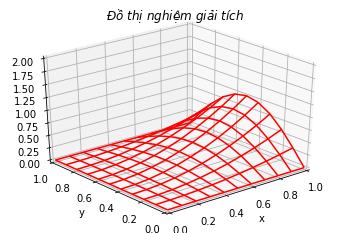

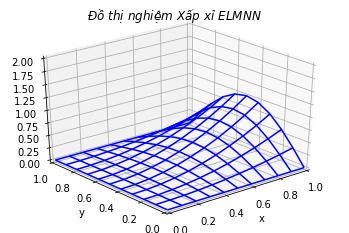

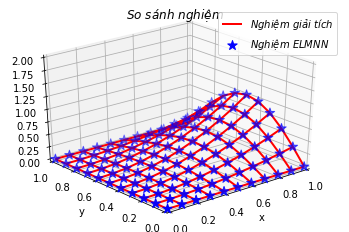

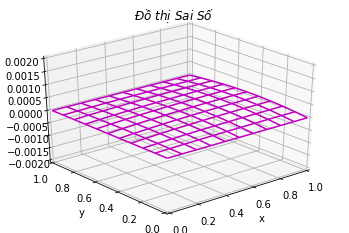

In [0]:

# Kiểm tra Độ chính xác Nghiêm xấp xỉ tìm được theo bộ tham số beta

def drawFunc(title,xs,ys,Z,zMin,zMax,face,c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    if face:
        ax.plot_surface(X,Y,Z,color=c)
    else:
        ax.plot_wireframe(X,Y,Z,color=c)
    ax.view_init(azim=230)
    plt.show()
    
   
def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        ax.plot_surface(X,Y,Z2,color='b')
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"]) 
        
    ax.view_init(azim=230)
    plt.show()    
  

# Dữ liệu Trực quan hóa

Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)

drawFunc("${Đồ\ thị\ nghiệm\ giải\ tích}$",xs,ys,Z1,0,2,False,'r')


Z2 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)

drawFunc("${Đồ\ thị\ nghiệm\ Xấp\ xỉ\ ELMNN}$",xs,ys,Z2,0,2,False,'b')

draw2Func("${So\ sánh\ nghiệm}$",xs,ys,Z1,Z2,0,2,False)

Zloss = Z2-Z1
drawFunc("${Đồ\ thị\ Sai\ Số}$",xs,ys,Zloss,-0.002,0.002,False,'m')




#Ve Bon do thi tren 1 bieu do

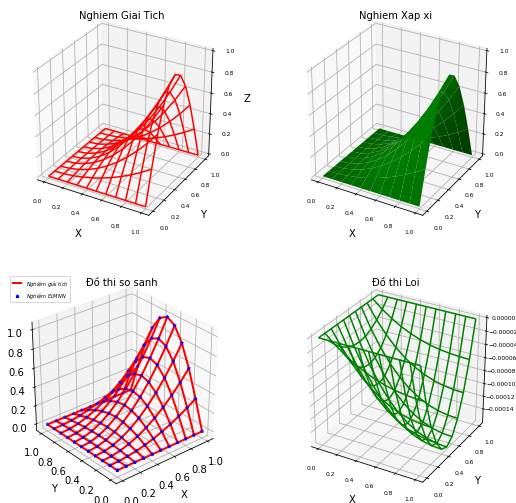

In [0]:
def draw3D(ax,xs,ys,Z,title,wireFrame,co,lsize):
   
    #ax = fig.add_subplot(r,c,k, projection='3d')
   
    ax.set_title(title,fontsize = 10)
    
    #ax.text(.5,.5,0,"anno")
    
    #ax.set_xlim(-3,3)
    #ax.set_ylim(-3,3)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.tick_params(direction='in',axis='both', which='major', labelsize=lsize)
    
    X, Y = np.meshgrid(xs,ys)
    if  wireFrame:
        ax.plot_wireframe(X,Y,Z,color=co)
    else:
        ax.plot_surface(X,Y,Z,color=co)
   

'''
def draw3D_2(fig,r,c,k,xs,ys,Z1,Z2,title,wireFrame,co,lsize):
   
    ax = fig.add_subplot(r,c,k, projection='3d')
   
    ax.set_title(title,fontsize = 10)
    
    #ax.text(.5,2.0,0,"Mono")
    ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"])
    
    #ax.set_xlim(-3,3)
    #ax.set_ylim(-3,3)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.tick_params(direction='in',axis='both', which='major', labelsize=lsize)
    
    X, Y = np.meshgrid(xs,ys)
    if  wireFrame:
        ax.plot_wireframe(X,Y,Z1,color=co)
        ax.plot_wireframe(X,Y,Z2,color=co)
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 10, color = 'b', marker='*')
    ax.view_init(azim=230)

 '''

def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        ax.plot_surface(X,Y,Z2,color='b')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"])
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"]) 
        
    ax.view_init(azim=230)
    plt.show()    
    
def draw3D_2(ax,xs,ys,Z1,Z2,title,wireFrame,co,lsize):
     
    ax.set_title(title,fontsize = 10)
    
    
    
    #ax.set_xlim(-3,3)
    #ax.set_ylim(-3,3)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.tick_params(direction='in',axis='both', which='major', labelsize=lsize)
    
    X, Y = np.meshgrid(xs,ys)
    if  wireFrame:
        ax.plot_wireframe(X,Y,Z1,color=co)
        ax.plot_wireframe(X,Y,Z2,color=co)
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"])
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 10, color = 'b', marker='*')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"], fontsize = 5, loc = 2)
    ax.view_init(azim=230)

def f(x):
    pi2 = np.pi**2
    return (2-pi2*x[0]**2)*np.sin(np.pi*x[1])

# use
nx = 11
ny = 11
xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)

#X, Y = np.meshgrid(xs,ys) truyen thang vao bi loi ???


Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
      x = np.array([xi,yi])      
      Z1[i][j] = solution(x)
      
Z2 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
      x = np.array([xi,yi])      
      Z2[i][j] = yTrial(x,W,beta)
        
fig = plt.figure(figsize = (9,9))  # hinh 1, lệnh này đưa ra ngoài hàm vẽ

ax1 = fig.add_subplot(2,2,1, projection='3d')
draw3D(ax1,xs,ys,Z1,"Nghiem Giai Tich",True,'r',6)

ax2 = fig.add_subplot(2,2,2, projection='3d')
draw3D(ax2,xs,ys,Z2,"Nghiem Xap xi",False,'g',6)

ax3 = fig.add_subplot(2,2,3, projection='3d')
draw3D_2(ax3,xs,ys,Z1,Z2,"Đồ thi so sanh",False,'b',10)

Zloss = Z1-Z2
ax4 = fig.add_subplot(2,2,4, projection='3d')
draw3D(ax4,xs,ys,Zloss,"Đồ thi Loi",True,'g',6)

plt.show()  # lệnh này đưa ra ngoài hàm vẽ
plt.close()




###Test với tập Huấn luyện mới

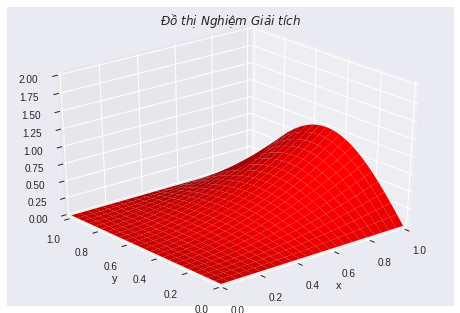

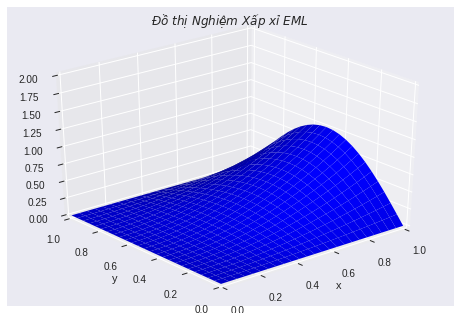

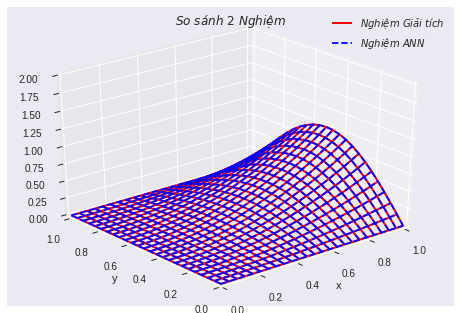

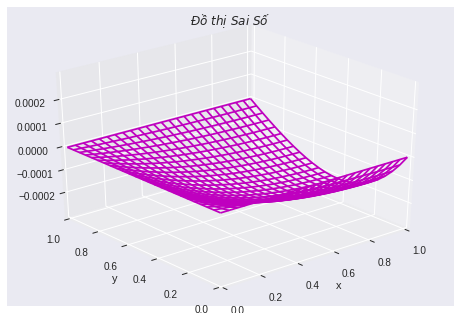

In [0]:
# Test Nghiệm

# Tập Test

# Rời rạc hóa Domain

nx = 25
ny = 25

xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)

Ztest = np.zeros((nx,ny))
Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Ztest[i][j] = yTrial(x,W,beta)
        Z1[i][j] = solution(x)


drawFunc("${Đồ\ thị\ Nghiệm\ Giải\ tích}$",xs,ys,Z1,0,2,True,'r')
drawFunc("${Đồ\ thị\ Nghiệm\ Xấp\ xỉ\ EML}$",xs,ys,Ztest,0,2,True,'b')
draw2Func("${So\ sánh\ 2\ Nghiệm}$",xs,ys,Z1,Ztest,0,2,False)
Zloss = Ztest-Z1
drawFunc("${Đồ\ thị\ Sai\ Số}$",xs,ys,Zloss,-0.0003,0.0003,False,'m')

### Phần So sánh với các điểm Test trong Bảng tương ứng của  Bài báo Chebyshev (example 2)

In [0]:
xs = np.array([0,0.2174,0.5870,0.3971,0.7193,0.8752,0.9471,0.4521,0.2980,0.6320])
ys = np.array([0.2318,0.7490,0.3285,0.6481,0.2871,0.5380,0.4691,0.8241,0.9153,0.1834])


Z2 = np.zeros((10,10))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)
        
Z1 = np.zeros((10,10))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)
        

#print('x1','x2','y','y_EML','err_EML',sep="        ")
print('  x1        x2               y               y_EML      err_EML')
print('-----------------------------------------------------------------')
for i in range(10):
    x = np.array([xs[i],ys[i]])
    y = solution(x)
    yEml = yTrial(x,W,beta) 
    
    print("%0.4f\t%8.4f\t%0.10f\t%0.10f\t%0.4f"%(x[0],x[1],y,yEml,yEml-y))

  x1        x2               y               y_EML      err_EML
-----------------------------------------------------------------
0.0000	  0.2318	0.0124549014	0.0124549014	0.0000
0.2174	  0.7490	0.5130098521	0.5129868415	-0.0000
0.5870	  0.3285	0.3460772365	0.3460384152	-0.0000
0.3971	  0.6481	0.4499641546	0.4499240990	-0.0000
0.7193	  0.2871	0.3618929424	0.3618624095	-0.0000
0.8752	  0.5380	0.4296658151	0.4296445717	-0.0000
0.9471	  0.4691	0.4073845178	0.4073747335	-0.0000
0.4521	  0.8241	0.6437860028	0.6437587600	-0.0000
0.2980	  0.9153	0.7904133224	0.7904011975	-0.0000
0.6320	  0.1834	0.3392043626	0.3391793921	-0.0000


### Phần lưu lại bộ tham số beta tốt nhất


#### Sau khi chạy phần này, không chạy phần Huấn luyện nữa

In [0]:
#Cần Lưu lại
betaBackup = beta.tolist()

print(betaBackup)


[-58618.6953125, 4959.876892089844, 76363.6298828125, 6214.98828125, 34780.541259765625, 56728.717041015625, 15085.306640625, -55867.783203125, 28829.2060546875, 21227.1298828125, 16227.346435546875, -6849.6328125, -24334.23388671875, 54070.57861328125, -63604.78283691406, -22851.4189453125, 43645.496337890625, 17718.103515625, -24374.1357421875, -23093.294921875, 2868.271484375, -262.81843185424805, 22595.0966796875, 1469.39111328125, -17132.2978515625, -4918.3837890625, 22184.92578125, 25211.814453125, -81736.8994140625, 18449.77783203125, 25206.330322265625, -64752.3828125, -12.105108737945557, 53207.93859863281, -3401.40283203125, 19081.4013671875, 50725.255859375, -24735.673553466797, 282.3577823638916, 7440.1363525390625, 35112.41650390625, 37010.568359375, 49350.841796875, -53472.767578125, 8851.947265625, 11854.3505859375, 18023.52264404297, 35106.9765625, -47668.0888671875, -46736.35498046875, -38361.66796875, -18465.955810546875, -20309.748901367188, 59832.23876953125, 33227.

In [0]:
#Cần Dùng lại Bộ tham số beta ( trước đó đã lưu )
beta = np.array(chép mảng ở phần lưu lại xuống đây)

#Chạy lại từ Phần Test ---> 

# Example  4 ( Bài báo Chebyshev và Bernstein )

##PDE 2018 NN ELM Bernstein 2018 10…8-9911-8.pdf -Example 4

\## ${\bigtriangledown^2u(x,y) = sin(πx1)  sin(πx2)}$

với x,y ${\in}$ [0,1]

${u(0,y) =0 }$

${u(1,y) = 0}$

${u(x,0) =  0}$

${u(x,1) =  0}$


Nghiêm Trial :

${u_{t}(x,y) = x(1-x)y(1-y)N(x,y,p) }$


${Với\  f_{0}(y) = 0}$

${Với\  f_{1}(y) = 0}$

${Với\  g_{0}(x) = 0}$

${Với \ g_{1}(x) = 0}$



Nghiệm giải tích ???

y = 1/2pi^2*sinpix1sinpix2



### Sửa 29-12

In [0]:
!pip install autograd
import autograd
import autograd.numpy as np
from autograd import grad, jacobian, hessian
from autograd import elementwise_grad as egrad

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:

# ------------------- Ham ------------------
def sigmoid(x):
    return 1./(1+np.exp(-x))

def f(x):
    pi = np.pi
    return np.sin(pi*x[0])*np.sin(pi*x[1])

def network_netout(x,W,beta):    # x la vector [x1,x2]
    wt = sigmoid(np.add(np.dot(x,W),bias)) 
    return (np.dot(wt,beta))


def yTrial(x,W,beta):
    net_out = network_netout(x,W,beta)
    return x[0]*(1-x[0])*x[1]*(1-x[1])*net_out

def solution(x):
    pi2 = np.pi**2
    pi = np.pi
    return -(np.sin(pi*x[0])*np.sin(pi*x[1]))/(2.0*pi2)



# ------------------- Ham ------------------

In [0]:
## Backup

# Rời rạc hóa Domain

nx = 11
ny = 11

n = 2        # input thuoc R^2
m = 1        # output thuoc R  

xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)
X, Y = np.meshgrid(xs,ys)

D = []       # Tập điểm huấn luyện

for i in range(nx):
    for j in range(ny):
        x = np.array([ X[i][j],Y[i][j] ])
        D.append(x)
  
D = np.array(D)
print('----Tap huan luyen D ---------')
print(D)
print('------------------------------')

# Tham số ANN
N_hides = D.shape[0]                    # số node ẩn = số tham số (các biến của Hệ Ptr) cần tìm = số điểm trong tập huấn luyện
W = np.random.rand(n,N_hides)           # tham số input --> hidden layer 
beta = np.random.rand(N_hides)          # tham số hidden layer --> output,cần tìm
#beta = np.zeros(N_hides)
bias = np.random.rand(N_hides)
#bias = np.zeros(N_hides)

# Xây dựng các Ma trận cho Hệ Phương trình

H = []
T = []

for i,x in enumerate(D):
        
    h_yTrial = hessian(yTrial,0)          # Hàm tạo Ma trận Hessian (2,2)
    
    d_beta_x = jacobian(h_yTrial,2)  
    #print(d_beta_x(x,W,beta).shape)      # (2,2,N_hides), chiều thử 3 là các đạo hàm riêng theo các beta_i
    
    pBetaX0 = d_beta_x(x,W,beta)[0][0]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx0^2
    #print(pBetaX0)
     
    pBetaX1 = d_beta_x(x,W,beta)[1][1]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx1^2
    #print(pBetaX1)
    
    pBeta = np.add(pBetaX0,pBetaX1)       # Cộng 2 bộ tham số
   
    #print(i,'. -------- Tham số của beta -------------')
    #print(pBeta)
    
    H.append(pBeta)                       # xây dựng dòng i của matrận H
            
    # Vector T ở vế phải
    func = f(x)  # vế phải
    beta0 = np.zeros(N_hides)            # Cho các tham số beta = 0 để lấy các hệ số tự do
    a0 = h_yTrial(x,W,beta0)[0][0]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx0^2
    b0 = h_yTrial(x,W,beta0)[1][1]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx1^2
    
    ti = func -a0 -b0                    # chuyển các hệ số tự do sang vế phải
    T.append(ti)                         # thành phần thứ i của vector T
    
   
H = np.array(H)
T = np.array(T)

detH = np.linalg.det(H)
print('----------------------------')
print('Giai Phuong trinh tìm beta ')
if detH!=0:
    beta =  np.linalg.solve(H,T)  
else:
    print('Định thức = 0')
    Hplus = np.linalg.pinv(H)   # Ma trận đảo poison
    beta = np.matmul(Hplus,T)   # Tìm beta
    
print('---------Bộ Tham số beta -------------------')
print(beta.shape)
print(beta)


----Tap huan luyen D ---------
[[0.  0. ]
 [0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]
 [0.  0.1]
 [0.1 0.1]
 [0.2 0.1]
 [0.3 0.1]
 [0.4 0.1]
 [0.5 0.1]
 [0.6 0.1]
 [0.7 0.1]
 [0.8 0.1]
 [0.9 0.1]
 [1.  0.1]
 [0.  0.2]
 [0.1 0.2]
 [0.2 0.2]
 [0.3 0.2]
 [0.4 0.2]
 [0.5 0.2]
 [0.6 0.2]
 [0.7 0.2]
 [0.8 0.2]
 [0.9 0.2]
 [1.  0.2]
 [0.  0.3]
 [0.1 0.3]
 [0.2 0.3]
 [0.3 0.3]
 [0.4 0.3]
 [0.5 0.3]
 [0.6 0.3]
 [0.7 0.3]
 [0.8 0.3]
 [0.9 0.3]
 [1.  0.3]
 [0.  0.4]
 [0.1 0.4]
 [0.2 0.4]
 [0.3 0.4]
 [0.4 0.4]
 [0.5 0.4]
 [0.6 0.4]
 [0.7 0.4]
 [0.8 0.4]
 [0.9 0.4]
 [1.  0.4]
 [0.  0.5]
 [0.1 0.5]
 [0.2 0.5]
 [0.3 0.5]
 [0.4 0.5]
 [0.5 0.5]
 [0.6 0.5]
 [0.7 0.5]
 [0.8 0.5]
 [0.9 0.5]
 [1.  0.5]
 [0.  0.6]
 [0.1 0.6]
 [0.2 0.6]
 [0.3 0.6]
 [0.4 0.6]
 [0.5 0.6]
 [0.6 0.6]
 [0.7 0.6]
 [0.8 0.6]
 [0.9 0.6]
 [1.  0.6]
 [0.  0.7]
 [0.1 0.7]
 [0.2 0.7]
 [0.3 0.7]
 [0.4 0.7]
 [0.5 0.7]
 [0.6 0.7]
 [0.7 0.7]
 [0.8 0.7]
 [0.9 0.7]
 [1.  0.7]
 

/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


----------------------------
Giai Phuong trinh tìm beta 
Định thức = 0
---------Bộ Tham số beta -------------------
(121,)
[-2.36216854e+05  1.54009230e+03 -4.35791584e+05 -3.34766245e+05
  3.34907202e+03 -3.90570301e+05  1.00919180e+06 -4.10801689e+05
 -5.02658214e+05  1.09250343e+05  8.56170981e+05 -2.78524813e+04
  1.32172026e+06  1.86485896e+06 -1.05543683e+06  3.38500994e+05
 -6.61858747e+05  7.38804052e+04  1.09590986e+05 -1.65699638e+05
 -2.26474226e+05 -1.04508091e+06 -5.57025882e+03 -9.70462893e+05
  8.46347846e+05  5.23004990e+05  8.14974532e+05  3.85000720e+04
 -5.04195417e+03 -6.63975646e+05  1.08841234e+05  8.21250409e+04
 -2.20980512e+05  1.25516150e+06 -2.21951457e+05 -1.32486717e+05
  5.36517933e+05 -5.43781504e+05  5.34852525e+05 -6.05537628e+05
  9.27642674e+05  1.86781125e+06  5.28784214e+05 -4.44614995e+04
 -5.48546870e+05  2.55673630e+05  1.08248766e+06 -1.35935089e+04
 -2.18465734e+05 -1.26128086e+06  4.09921952e+05 -2.46590354e+05
  9.29065447e+04 -1.08632981e+06

In [0]:
## Edit

# Rời rạc hóa Domain

nx = 11
ny = 11

n = 2        # input thuoc R^2
m = 1        # output thuoc R  

xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)
X, Y = np.meshgrid(xs,ys)

D = []       # Tập điểm huấn luyện

for i in range(nx):
    for j in range(ny):
        x = np.array([ X[i][j],Y[i][j] ])
        D.append(x)
  
D = np.array(D)

# Tham số ANN
N_hides = D.shape[0]                    # số node ẩn = số tham số (các biến của Hệ Ptr) cần tìm = số điểm trong tập huấn luyện
W = np.random.rand(n,N_hides)           # tham số input --> hidden layer 
beta = np.random.rand(N_hides)          # tham số hidden layer --> output,cần tìm
bias = np.random.rand(N_hides)


betaArray = []    # Luu các bộ beta tìm được
so_lan_chay = 5

for k in range(so_lan_chay):
    # Khoi tao W nhau nhien khac nhau cho moi lan thu
    W = np.random.rand(n,N_hides)   
    
    # Xây dựng các Ma trận cho Hệ Phương trình
    H = []
    T = []

    for i,x in enumerate(D):

        h_yTrial = hessian(yTrial,0)          # Hàm tạo Ma trận Hessian (2,2)

        d_beta_x = jacobian(h_yTrial,2)  
        
        pBetaX0 = d_beta_x(x,W,beta)[0][0]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx0^2
      
        pBetaX1 = d_beta_x(x,W,beta)[1][1]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx1^2
        
        pBeta = np.add(pBetaX0,pBetaX1)       # Cộng 2 bộ tham số

        H.append(pBeta)                       # xây dựng dòng i của matrận H

        # Vector T ở vế phải
        func = f(x)  # vế phải
        beta0 = np.zeros(N_hides)            # Cho các tham số beta = 0 để lấy các hệ số tự do
        a0 = h_yTrial(x,W,beta0)[0][0]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx0^2
        b0 = h_yTrial(x,W,beta0)[1][1]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx1^2

        ti = func -a0 -b0                    # chuyển các hệ số tự do sang vế phải
        T.append(ti)                         # thành phần thứ i của vector T


    H = np.array(H)
    T = np.array(T)

    detH = np.linalg.det(H)
    if detH!=0:
        beta =  np.linalg.solve(H,T)  
    else:
        Hplus = np.linalg.pinv(H)   # Ma trận đảo poison
        beta = np.matmul(Hplus,T)   # Tìm beta

    betaArray.append(beta.tolist())

betaArray = np.array(betaArray)

print(betaArray.shape)


# Tim bộ beta có sai số nhỏ nhất trong các bộ beta tìm được
def tinhGiatriLoi(nx,ny,beta_temp):    #a là 1 bo tham so
    xs = np.linspace(0,1,nx)
    ys = np.linspace(0,1,ny)
    # Xac dinh loi theo SME
    errorSum = 0
    for i, xi in enumerate(xs):
        for j, yi in enumerate(ys):
            x = np.array([xi,yi])
            errorSum += ( solution(x) - yTrial(x,W,beta_temp) )**2
    return errorSum/(nx*ny)
     
for k in range(so_lan_chay):
    print(tinhGiatriLoi(nx,ny,betaArray[k]))



/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


(5, 121)
575171808.776332
633690.2449215265
49010610.565203495
124432483.26860926
1.599308397766459e-10


In [0]:
beta = betaArray[4]

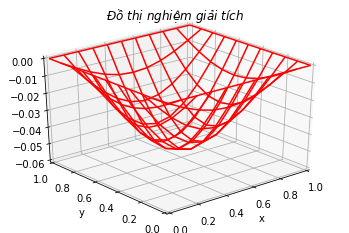

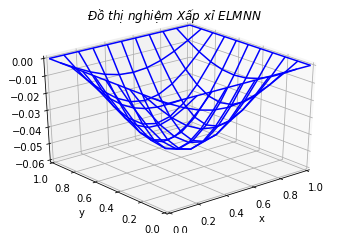

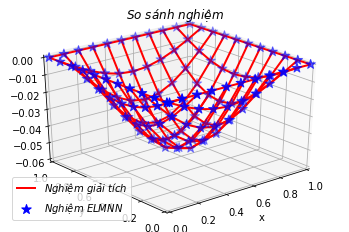

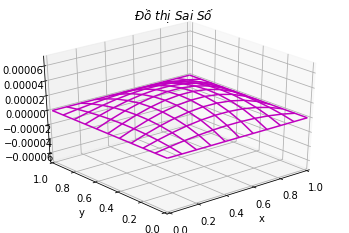

In [0]:
# Kiểm tra Độ chính xác Nghiêm xấp xỉ tìm được theo bộ tham số beta

def drawFunc(title,xs,ys,Z,zMin,zMax,face,c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    if face:
        ax.plot_surface(X,Y,Z,color=c)
    else:
        ax.plot_wireframe(X,Y,Z,color=c)
    ax.view_init(azim=230)
    plt.show()
    
   
def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        ax.plot_surface(X,Y,Z2,color='b')
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"]) 
        
    ax.view_init(azim=230)
    plt.show()    
  

# Dữ liệu Trực quan hóa

Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)


drawFunc("${Đồ\ thị\ nghiệm\ giải\ tích}$",xs,ys,Z1,-0.06,0,False,'r')


Z2 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)



drawFunc("${Đồ\ thị\ nghiệm\ Xấp\ xỉ\ ELMNN}$",xs,ys,Z2,-0.06,0,False,'b')

        
draw2Func("${So\ sánh\ nghiệm}$",xs,ys,Z1,Z2,-0.06,0,False)


Zloss = Z2-Z1
drawFunc("${Đồ\ thị\ Sai\ Số}$",xs,ys,Zloss,-0.00007,0.00007,False,'m')




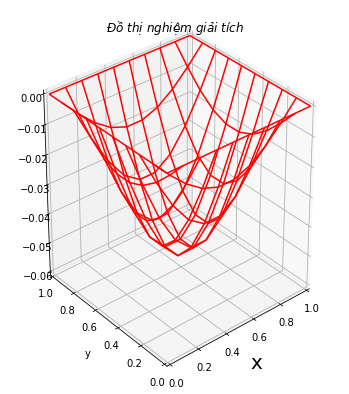

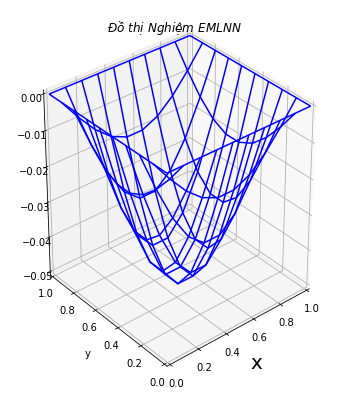

<Figure size 432x288 with 0 Axes>

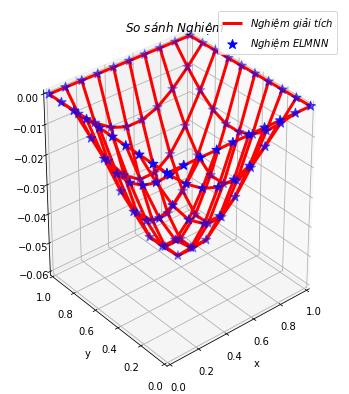

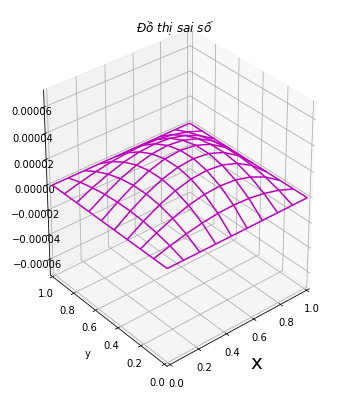

In [0]:
# Kiểm tra Độ chính xác Nghiêm xấp xỉ tìm được theo bộ tham số beta
from matplotlib import cm

nx = 10
ny = 10
xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)

  
def drawFunc(title,xs,ys,Z,zMin,zMax,face,c):
    fig = plt.figure(figsize = (6,7))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.xaxis.label.set_fontsize(20)
    #ax.get_xticklabels().set_fontsize(20)
    ax.tick_params(axis='both', labelsize=10, pad = 0.7, grid_color='r',grid_alpha=0.5)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    if face:
        #ax.plot_surface(X,Y,Z,color=c)
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=False) 
    else:
        ax.plot_wireframe(X,Y,Z,color=c)
    ax.view_init(azim=230)
    plt.show()
    
def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    fig = plt.figure(figsize = (6,7))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        #ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=False,color='r') 
        ax.plot_surface(X,Y,Z2,color='b')
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=3)
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        #ax.scatter(X, Y, Z1, s = 100, color = 'r', marker='x')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"])
        
    ax.view_init(azim=230)
    plt.show()    
  


# Dữ liệu Trực quan hóa

Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)


#drawFunc("${Đồ\ thị\ Nghiệm}$",xs,ys,Z1,-0.06,0,True,'r')
drawFunc("${Đồ\ thị\ nghiệm\ giải\ tích}$",xs,ys,Z1,-0.06,0,False,'r')

Z2 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)


drawFunc("${Đồ\ thị\ Nghiệm\ EMLNN}$",xs,ys,Z2,-0.05,0.0,False,'b')

        
draw2Func("${So\ sánh\ Nghiệm}$",xs,ys,Z1,Z2,-0.06,0,False)


Zloss = Z2-Z1
drawFunc("${Đồ\ thị\ sai\ số}$",xs,ys,Zloss,-0.00007,0.00007,False,'m')

## Phần So sánh với các điểm Test trong Bảng tương ứng của 2 Bài báo

In [0]:


xs = np.array([0,0.1710,0.3900,0.47,0.825,0.34,0.741,0.95,0.153,0.937])
ys = np.array([0.891,0.077,0.194,0.284,0.539,0.682,0.568,0.394,0.882,0.472])


Z2 = np.zeros((10,10))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)
        
Z1 = np.zeros((10,10))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)
        

#print('x1','x2','y','y_EML','err_EML',sep="        ")
print('  x1        x2               y               y_EML      err_EML')
print('-----------------------------------------------------------------')
for i in range(10):
    x = np.array([xs[i],ys[i]])
    y = solution(x)
    yEml = yTrial(x,W,beta) 
    
    print("%0.4f\t%8.4f\t%.10f\t%.10f\t%.2e"%(x[0],x[1],y,yEml,yEml-y))

  x1        x2               y               y_EML      err_EML
-----------------------------------------------------------------
0.0000	  0.8910	-0.0000000000	-0.0000000000	0.00e+00
0.1710	  0.0770	-0.0062103901	-0.0062087484	1.64e-06
0.3900	  0.1940	-0.0272853073	-0.0272789732	6.33e-06
0.4700	  0.2840	-0.0392623365	-0.0392534986	8.84e-06
0.8250	  0.5390	-0.0262716549	-0.0262654295	6.23e-06
0.3400	  0.6820	-0.0373330746	-0.0373234067	9.67e-06
0.7410	  0.5680	-0.0359838439	-0.0359754522	8.39e-06
0.9500	  0.3940	-0.0074896840	-0.0074878261	1.86e-06
0.1530	  0.8820	-0.0084858744	-0.0084829819	2.89e-06
0.9370	  0.4720	-0.0099229126	-0.0099204624	2.45e-06


## Phần lưu lại bộ tham số beta tốt nhất


#### Sau khi chạy phần này, không chạy phần Huấn luyện nữa

In [0]:
#Cần Lưu lại
betaBackup = beta.tolist()

print(betaBackup)


In [0]:
#Cần Dùng lại Bộ tham số beta ( trước đó đã lưu )
beta = np.array(chép mảng ở phần lưu lại xuống đây)

#Chạy lại từ Phần Test ---> 

# Example 5  ( Bài báo Chebyshev và Bernstein )

${\bigtriangledown^2u(x) = e^{-x}(x-2+y^{3}+6y)}$

với x,y ${\in}$ [0,1]

${u(0,y) = y^3 }$

${u(1,y) = (1+y^3)e^{-1}}$

${u(x,0) =  xe^{-x}}$

${u(x,1) = e^{-x}(x+1)}$

${u_{t}(x,y) = A(x,y) + x(1-x)y(1-y)N(x,y,p)}$


${A(x,y) = (1-x)y^3 + x(1+y^3)e^{-1} + (1-y)x(e^{-x} - e^{-1}) + y[(1+x)e^{-x} -(1-x+2xe^{-1})]}$

Nghiệm giải tích
${u_{a}(x,y) = e^{-x}(x+y^3)}$

**Book** :

"Artificial Neural Networks for Solving Ordinary
and Partial Differential Equations"
Isaac Elias Lagaris, Aristidis Likas, Member, IEEE, and Dimitrios I. Fotiadis. Problem 5.

In [0]:
!pip install autograd
import autograd
import autograd.numpy as np
from autograd import grad, jacobian, hessian
from autograd import elementwise_grad as egrad

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:

# ------------------- Ham ------------------
def A(x): # nhập thiếu
    return (1-x[0])*x[1]**3 + x[0]*(1+x[1]**3)*np.exp(-1) + (1-x[1])*x[0]*(np.exp(-x[0])- np.exp(-1))+x[1]*((1+x[0])*np.exp(-x[0])-(1-x[0]+2*x[0]*np.exp(-1)))

def sigmoid(x):
    return 1./(1+np.exp(-x))

def f(x):
    #z = (x[0]-2+x[1]**3+6*x[1])
    return np.exp(-x[0])*(x[0]-2+x[1]**3+6*x[1])   # chính xác hơn

def network_netout(x,W,beta):    # x la vector [x1,x2]
    wt = sigmoid(np.add(np.dot(x,W),bias)) 
    return (np.dot(wt,beta))


def yTrial(x,W,beta):
    net_out = network_netout(x,W,beta)
    #return A(x) + x[0]*(1-x[0])*x[1]*(1-x[1])*net_out
    return A(x) + x[0]*(1-x[0])*x[1]*(1-x[1])*net_out

def solution(x):
	return np.exp(-x[0])*(x[0]+x[1]**3)



# ------------------- Ham ------------------

In [0]:
def f(x):
  return x[0]**2+2*x[1]**3
x = np.array([2.0,3.0])
print(f(x))
f1 = jacobian(f)
print(type(f1))
print(f1(x))

f1 = jacobian(jacobian(f))
print(f1(x))
f2 = hessian(f,0)
print(f2(x))



58.0
<class 'function'>
[ 4. 54.]
[[ 2.  0.]
 [ 0. 36.]]
[[ 2.  0.]
 [ 0. 36.]]


/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


In [0]:
# Backup Chạy 1 lần
# Rời rạc hóa Domain

nx = 11
ny = 11

n = 2        # input thuoc R^2
m = 1        # output thuoc R  

xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)
X, Y = np.meshgrid(xs,ys)

D = []       # Tập điểm huấn luyện

for i in range(nx):
    for j in range(ny):
        x = np.array([ X[i][j],Y[i][j] ])
        D.append(x)
  
D = np.array(D)
print('----Tap huan luyen D ---------')
print(D)
print('------------------------------')

# Tham số ANN
N_hides = D.shape[0]                    # số node ẩn = số tham số (các biến của Hệ Ptr) cần tìm = số điểm trong tập huấn luyện
W = np.random.rand(n,N_hides)           # tham số input --> hidden layer 
beta = np.random.rand(N_hides)          # tham số hidden layer --> output,cần tìm
bias = np.random.rand(N_hides)


# Xây dựng các Ma trận cho Hệ Phương trình


H = []
T = []

for i,x in enumerate(D):
        
    h_yTrial = hessian(yTrial,0)          # Hàm tạo Ma trận Hessian (2,2)
    
    d_beta_x = jacobian(h_yTrial,2)  
    #print(d_beta_x(x,W,beta).shape)      # (2,2,N_hides), chiều thử 3 là các đạo hàm riêng theo các beta_i
    
    pBetaX0 = d_beta_x(x,W,beta)[0][0]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx0^2
    #print(pBetaX0)
     
    pBetaX1 = d_beta_x(x,W,beta)[1][1]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx1^2
    #print(pBetaX1)
    
    pBeta = np.add(pBetaX0,pBetaX1)       # Cộng 2 bộ tham số
   
    #print(i,'. -------- Tham số của beta -------------')
    #print(pBeta)
    
    H.append(pBeta)                       # xây dựng dòng i của matrận H
            
    # Vector T ở vế phải
    func = f(x)  # vế phải
    beta0 = np.zeros(N_hides)            # Cho các tham số beta = 0 để lấy các hệ số tự do
    a0 = h_yTrial(x,W,beta0)[0][0]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx0^2
    b0 = h_yTrial(x,W,beta0)[1][1] 
    # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx1^2
    print(func)
  
    ti = func -a0 -b0                    # chuyển các hệ số tự do sang vế phải
    T.append(ti)                         # thành phần thứ i của vector T
    
   
H = np.array(H)
T = np.array(T)

'''
print('----------------------------')
print('Ma tran H ')
print(H.shape)
print(H)

print('----------------------------')
print('Vector T ')
print(T.shape)
print(T)

print('----------------------------')
print('Định thức của H ')
detH = np.linalg.det(H)
#print(detH)
'''

detH = np.linalg.det(H)
print('----------------------------')
print('Giai Phuong trinh tìm beta ')
if detH!=0:
    beta =  np.linalg.solve(H,T)  
else:
    print('Định thức = 0')
    Hplus = np.linalg.pinv(H)   # Ma trận đảo poison
    beta = np.matmul(Hplus,T)   # Tìm beta
    
print('---------Bộ Tham số beta -------------------')
print(beta.shape)
print(beta)

----Tap huan luyen D ---------
[[0.  0. ]
 [0.1 0. ]
 [0.2 0. ]
 [0.3 0. ]
 [0.4 0. ]
 [0.5 0. ]
 [0.6 0. ]
 [0.7 0. ]
 [0.8 0. ]
 [0.9 0. ]
 [1.  0. ]
 [0.  0.1]
 [0.1 0.1]
 [0.2 0.1]
 [0.3 0.1]
 [0.4 0.1]
 [0.5 0.1]
 [0.6 0.1]
 [0.7 0.1]
 [0.8 0.1]
 [0.9 0.1]
 [1.  0.1]
 [0.  0.2]
 [0.1 0.2]
 [0.2 0.2]
 [0.3 0.2]
 [0.4 0.2]
 [0.5 0.2]
 [0.6 0.2]
 [0.7 0.2]
 [0.8 0.2]
 [0.9 0.2]
 [1.  0.2]
 [0.  0.3]
 [0.1 0.3]
 [0.2 0.3]
 [0.3 0.3]
 [0.4 0.3]
 [0.5 0.3]
 [0.6 0.3]
 [0.7 0.3]
 [0.8 0.3]
 [0.9 0.3]
 [1.  0.3]
 [0.  0.4]
 [0.1 0.4]
 [0.2 0.4]
 [0.3 0.4]
 [0.4 0.4]
 [0.5 0.4]
 [0.6 0.4]
 [0.7 0.4]
 [0.8 0.4]
 [0.9 0.4]
 [1.  0.4]
 [0.  0.5]
 [0.1 0.5]
 [0.2 0.5]
 [0.3 0.5]
 [0.4 0.5]
 [0.5 0.5]
 [0.6 0.5]
 [0.7 0.5]
 [0.8 0.5]
 [0.9 0.5]
 [1.  0.5]
 [0.  0.6]
 [0.1 0.6]
 [0.2 0.6]
 [0.3 0.6]
 [0.4 0.6]
 [0.5 0.6]
 [0.6 0.6]
 [0.7 0.6]
 [0.8 0.6]
 [0.9 0.6]
 [1.  0.6]
 [0.  0.7]
 [0.1 0.7]
 [0.2 0.7]
 [0.3 0.7]
 [0.4 0.7]
 [0.5 0.7]
 [0.6 0.7]
 [0.7 0.7]
 [0.8 0.7]
 [0.9 0.7]
 [1.  0.7]
 

/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


-1.2593909751589203
-1.072512073657023
-0.9097959895689501
-0.7683362905316369
-0.6455608949288322
-0.5391947569406659
-0.44722662571465904
-0.36787944117144233
-1.399
-1.1753838060287114
-0.9816581729405003
-0.814159224529208
-0.6696497259896038
-0.5452710630816575
-0.43850049723912704
-0.3471131273501951
-0.2691480495062157
-0.202878260210559
-0.14678389702740546
-0.7919999999999998
-0.6261474932808837
-0.4846886058221651
-0.364482564575405
-0.26276545804597057
-0.17710695263608886
-0.10537183413005291
-0.04568584794880949
0.0035946317129378754
0.043909523251984744
0.07651892376366007
-0.17299999999999982
-0.0660531315166248
0.02210573033310562
0.09408391402657834
0.1521626504500902
0.19833552572603125
0.23434256861214942
0.261700455098073
0.28172926050149805
0.2955761426314156
0.3042362978487829
0.4640000000000004
0.5103283037722817
0.5436372200437802
0.5659851206008328
0.5791565197747925
0.5846955559629788
0.5839355808040444
0.5780252936132009
0.5679518106441682
0.5545610158861773


In [0]:
# Edit Chạy nhiều lần
# Rời rạc hóa Domain

nx = 11
ny = 11

n = 2        # input thuoc R^2
m = 1        # output thuoc R  

xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)
X, Y = np.meshgrid(xs,ys)

D = []       # Tập điểm huấn luyện

for i in range(nx):
    for j in range(ny):
        x = np.array([ X[i][j],Y[i][j] ])
        D.append(x)
  
D = np.array(D)


# Tham số ANN
N_hides = D.shape[0]                    # số node ẩn = số tham số (các biến của Hệ Ptr) cần tìm = số điểm trong tập huấn luyện
W = np.random.rand(n,N_hides)           # tham số input --> hidden layer 
beta = np.random.rand(N_hides)          # tham số hidden layer --> output,cần tìm
bias = np.random.rand(N_hides)


betaArray = []    # Luu các bộ beta tìm được
so_lan_chay = 1

for k in range(so_lan_chay):
    # Khoi tao W nhau nhien khac nhau cho moi lan thu
    W = np.random.rand(n,N_hides) 
    
    # Xây dựng các Ma trận cho Hệ Phương trình
    H = []
    T = []

    for i,x in enumerate(D):

        h_yTrial = hessian(yTrial,0)          # Hàm tạo Ma trận Hessian (2,2)

        d_beta_x = jacobian(h_yTrial,2)  
      
        pBetaX0 = d_beta_x(x,W,beta)[0][0]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx0^2
       
        pBetaX1 = d_beta_x(x,W,beta)[1][1]    # Lấy bộ hệ số của các tham số beta của d2_yTrial/dx1^2
        
        pBeta = np.add(pBetaX0,pBetaX1)       # Cộng 2 bộ tham số

        H.append(pBeta)                       # xây dựng dòng i của matrận H

        # Vector T ở vế phải
        func = f(x)  # vế phải
        beta0 = np.zeros(N_hides)            # Cho các tham số beta = 0 để lấy các hệ số tự do
        a0 = h_yTrial(x,W,beta0)[0][0]       # Lấy hệ số tự do ( biến là các tham số Beta ) của d2_yTrial/dx0^2
        b0 = h_yTrial(x,W,beta0)[1][1] 
       
        ti = func -a0 -b0                    # chuyển các hệ số tự do sang vế phải
        T.append(ti)                         # thành phần thứ i của vector T


    H = np.array(H)
    T = np.array(T)

    detH = np.linalg.det(H)
    if detH!=0:
        beta =  np.linalg.solve(H,T)  
    else:
        Hplus = np.linalg.pinv(H)   # Ma trận đảo poison
        beta = np.matmul(Hplus,T)   # Tìm beta
        betaArray.append(beta.tolist())

betaArray = np.array(betaArray)

print(betaArray.shape)


# Tim bộ beta có sai số nhỏ nhất trong các bộ beta tìm được

def tinhGiatriLoi(nx,ny,beta_temp):    #beta_temp là 1 bo tham so
    xs = np.linspace(0,1,nx)
    ys = np.linspace(0,1,ny)
    # Xac dinh loi theo SME
    errorSum = 0
    for i, xi in enumerate(xs):
        for j, yi in enumerate(ys):
            x = np.array([xi,yi])
            errorSum += ( solution(x) - yTrial(x,W,beta_temp) )**2
    return errorSum/(nx*ny)

'''
def tinhGiatriMaxLoi(nx,ny,beta_temp):    #beta_temp là 1 bo tham so
    xs = np.linspace(0,1,nx)
    ys = np.linspace(0,1,ny)
    # Xac dinh loi theo SME
    errorMaxs = []
    for i, xi in enumerate(xs):
        for j, yi in enumerate(ys):
            x = np.array([xi,yi])
            t = ( solution(x) - yTrial(x,W,beta_temp) )
            errorMaxs.append(t) 
    errorMaxs = np.array(errorMaxs)
    return np.max(errorMaxs)

'''

print('Sai so Loi trung binh')
print('-------------------------')
betaAvg = []
for k in range(so_lan_chay):
    betaAvg.append(tinhGiatriLoi(nx,ny,betaArray[k]))
    print(tinhGiatriLoi(nx,ny,betaArray[k]))
betaAvg = np.array(betaAvg) 

'''   
print('Sai so Loi lon nhat')
betaMax = []
print('-------------------------')
for k in range(so_lan_chay):
    betaMax.append(tinhGiatriMaxLoi(nx,ny,betaArray[k]))
    print(tinhGiatriMaxLoi(nx,ny,betaArray[k]))
    
betaMax = np.array(betaMax) 
'''

print('index phan tu loi tb nho nhat')
print(np.min(betaAvg))
print(np.argmin(betaAvg))

#print('index phan tu max loi tb nho nhat')
#print(np.min(betaMax))
#print(np.argmin(betaMax))

/usr/local/lib/python3.6/dist-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


(1, 121)
Sai so Loi trung binh
-------------------------
1.1507418385404496e-09
index phan tu loi tb nho nhat
1.1507418385404496e-09
0


In [0]:
m = np.argmin(betaAvg)
beta = betaArray[m]


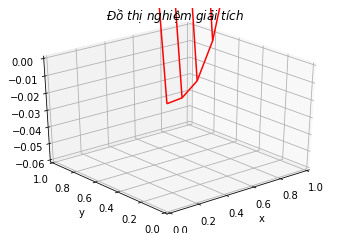

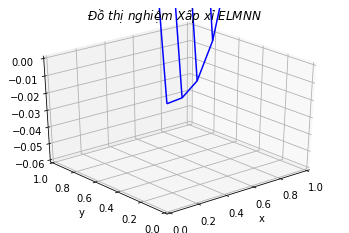

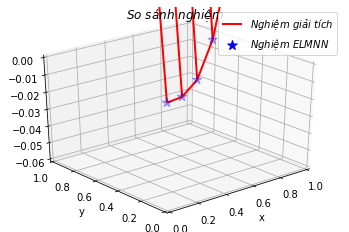

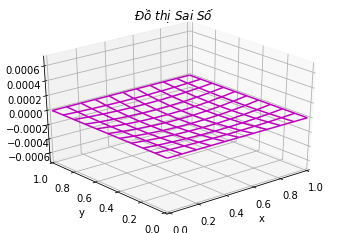

In [0]:
# Kiểm tra Độ chính xác Nghiêm xấp xỉ tìm được theo bộ tham số beta

def drawFunc(title,xs,ys,Z,zMin,zMax,face,c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    if face:
        ax.plot_surface(X,Y,Z,color=c)
    else:
        ax.plot_wireframe(X,Y,Z,color=c)
    ax.view_init(azim=230)
    plt.show()
    
   
def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        ax.plot_surface(X,Y,Z2,color='b')
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ ELMNN}$"]) 
        
    ax.view_init(azim=230)
    plt.show()    
  

# Dữ liệu Trực quan hóa

Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)


drawFunc("${Đồ\ thị\ nghiệm\ giải\ tích}$",xs,ys,Z1,-0.06,0,False,'r')


Z2 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)



drawFunc("${Đồ\ thị\ nghiệm\ Xấp\ xỉ\ ELMNN}$",xs,ys,Z2,-0.06,0,False,'b')

        
draw2Func("${So\ sánh\ nghiệm}$",xs,ys,Z1,Z2,-0.06,0,False)


Zloss = Z2-Z1
drawFunc("${Đồ\ thị\ Sai\ Số}$",xs,ys,Zloss,-0.0007,0.0007,False,'m')





Tham so Beta
[717.75927734375, -73.17259979248047, 19.273681640625, -47.238861083984375, -3.5541839599609375, -5.545257568359375, 34.498565673828125, -110.65921020507812, -61.6060791015625, -68.96694946289062, 6.0465087890625, -135.363525390625, 15.255035400390625, 58.872711181640625, -38.83251953125, -4.6602935791015625, -18.486251831054688, 9.247528076171875, 77.16643524169922, 72.02435302734375, 119.58135986328125, 17.01422119140625, 24.203533172607422, -70.62490844726562, -209.262451171875, -2.064178466796875, 14.887359619140625, 7.49945068359375, 44.70860290527344, 87.05160522460938, -47.277099609375, -27.318603515625, -18.09857177734375, -7.210302352905273, -3.55389404296875, -8.940460205078125, 158.22119140625, -37.437255859375, -86.26139831542969, -32.24110412597656, 133.20046997070312, -18.663406372070312, 78.53549194335938, -17.845760345458984, 1.114593505859375, -63.7000732421875, -43.7547607421875, -18.249420166015625, 14.383026123046875, 121.46728515625, 13.2095947265625, 

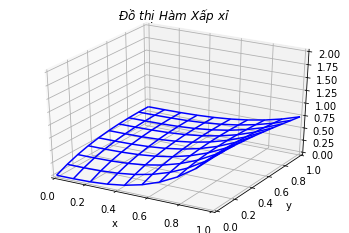

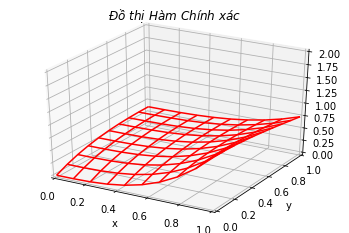

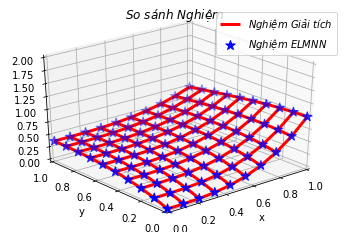

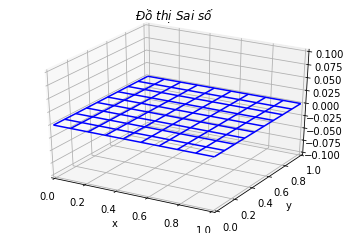

In [0]:
# Kiểm tra Độ chính xác Nghiêm xấp xỉ tìm được theo bộ tham số beta
from matplotlib import cm

nx = 10
ny = 10
xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)

def drawFunc(title,xs,ys,Z,zMin,zMax,face,c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #test
    

    #ax.scatter(xs, ys, zs, c=c, marker=m)

    
    #test
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    if face:
        ax.plot_surface(X,Y,Z,color=c)
        #ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=False) 
    else:
        ax.plot_wireframe(X,Y,Z,color=c)
        #ax.scatter(X, Y, Z, color = 'b', marker='*')
        
    #ax.view_init(azim=230)
    plt.show()
    
def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        #ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        ax.plot_surface(X, Y, Z1, linewidth=0,color = 'r' ) 
        ax.plot_surface(X,Y,Z2,color='b')
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=3)
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        ax.legend(["${Nghiệm\ Giải\ tích}$","${Nghiệm\ ELMNN}$"])
        
    ax.view_init(azim=230)
    plt.show()    
  
betaList = beta.tolist()
print('Tham so Beta')
print(betaList)
print('Tham số W')
print(W)

Zs = np.zeros((nx,ny))
Z3 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z3[i][j] = yTrial(x,W,beta)
        Zs[i][j] = solution(x)

drawFunc("${Đồ\ thị\ Hàm\ Xấp\ xỉ}$",xs,ys,Z3,0,2,False,'b')
drawFunc("${Đồ\ thị\ Hàm\ Chính\ xác}$",xs,ys,Zs,0,2,False,'r')
draw2Func("${So\ sánh\ Nghiệm}$",xs,ys,Zs,Z3,0,2,False)
drawFunc("${Đồ\ thị\ Sai\ số}$",xs,ys,Zs-Z3,-.1,.1,False,'b')


## Phần So sánh với các điểm Test trong Bảng tương ứng của 2 Bài báo

In [0]:


xs = np.array([0,0.2174,0.5870,0.3971,0.7193,0.8752,0.9471,0.4521,0.2980,0.6320])
ys = np.array([0.2318,0.7490,0.3285,0.6481,0.2871,0.5380,0.4691,0.8241,0.9153,0.1834])


Z2 = np.zeros((10,10))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z2[i][j] = yTrial(x,W,beta)
        
Z1 = np.zeros((10,10))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)
        

#print('x1','x2','y','y_EML','err_EML',sep="        ")
print('  x1        x2               y               y_EML      err_EML')
print('-----------------------------------------------------------------')
for i in range(10):
    x = np.array([xs[i],ys[i]])
    y = solution(x)
    yEml = yTrial(x,W,beta) 
    
    print("%0.4f\t%8.4f\t%0.10f\t%0.10f\t%0.2e"%(x[0],x[1],y,yEml,yEml-y))

  x1        x2               y               y_EML      err_EML
-----------------------------------------------------------------
0.0000	  0.2318	0.0124549014	0.0124549014	0.00e+00
0.2174	  0.7490	0.5130098521	0.5129868415	-2.30e-05
0.5870	  0.3285	0.3460772365	0.3460384152	-3.88e-05
0.3971	  0.6481	0.4499641546	0.4499240990	-4.01e-05
0.7193	  0.2871	0.3618929424	0.3618624095	-3.05e-05
0.8752	  0.5380	0.4296658151	0.4296445717	-2.12e-05
0.9471	  0.4691	0.4073845178	0.4073747335	-9.78e-06
0.4521	  0.8241	0.6437860028	0.6437587600	-2.72e-05
0.2980	  0.9153	0.7904133224	0.7904011975	-1.21e-05
0.6320	  0.1834	0.3392043626	0.3391793921	-2.50e-05


## Phần lưu lại bộ tham số beta tốt nhất


#### Sau khi chạy phần này, không chạy phần Huấn luyện nữa

In [0]:
#Cần Lưu lại
betaBackup = beta.tolist()
wbackup = W.tolist()
biasbackup = bias.tolist()
print("-------------------------beta -----------------------")
print(betaBackup)
print("------------------------w------------------------")
print(wbackup)
print("-------------------------bias-----------------------")
print(biasbackup)



-------------------------beta -----------------------
[-350.9464111328125, -29.128372192382812, 81.39447021484375, 224.1905517578125, 0.43836212158203125, 2.6283206939697266, 165.137451171875, -1.5919151306152344, -340.2525634765625, -89.03878784179688, 124.81167602539062, 206.83328247070312, -8.621944427490234, -333.24169921875, -195.6259765625, 146.01702880859375, -187.86904907226562, -1.098520278930664, 268.1473388671875, 260.982421875, 20.535438537597656, 85.2022705078125, 34.1446533203125, -114.90274047851562, -311.1993713378906, -28.706016540527344, 108.99219512939453, 156.764892578125, -339.9280548095703, 3.6092758178710938, 317.94810485839844, -3.5980911254882812, 142.322509765625, -549.0745239257812, -68.8101806640625, 121.26397705078125, 287.62890625, -84.75881958007812, -178.953369140625, 389.1112060546875, 70.53135681152344, 28.001480102539062, 96.46817016601562, -115.7655029296875, -50.12701416015625, 24.370162963867188, -11.31536865234375, -168.91705322265625, 287.8385009

In [0]:
#Cần Dùng lại Bộ tham số beta ( trước đó đã lưu )
beta = np.array([-350.9464111328125, -29.128372192382812, 81.39447021484375, 224.1905517578125, 0.43836212158203125, 2.6283206939697266, 165.137451171875, -1.5919151306152344, -340.2525634765625, -89.03878784179688, 124.81167602539062, 206.83328247070312, -8.621944427490234, -333.24169921875, -195.6259765625, 146.01702880859375, -187.86904907226562, -1.098520278930664, 268.1473388671875, 260.982421875, 20.535438537597656, 85.2022705078125, 34.1446533203125, -114.90274047851562, -311.1993713378906, -28.706016540527344, 108.99219512939453, 156.764892578125, -339.9280548095703, 3.6092758178710938, 317.94810485839844, -3.5980911254882812, 142.322509765625, -549.0745239257812, -68.8101806640625, 121.26397705078125, 287.62890625, -84.75881958007812, -178.953369140625, 389.1112060546875, 70.53135681152344, 28.001480102539062, 96.46817016601562, -115.7655029296875, -50.12701416015625, 24.370162963867188, -11.31536865234375, -168.91705322265625, 287.8385009765625, -23.279824256896973, -39.7735595703125, -199.52923583984375, -43.41546630859375, -245.9996337890625, 174.02499389648438, -455.043212890625, 373.096435546875, -75.2030029296875, -95.2802734375, -396.3597412109375, -35.86669921875, -277.2554016113281, 78.26318359375, -37.91302490234375, 66.50952911376953, -30.71588897705078, 4.285797119140625, 411.92449951171875, 73.83096313476562, -477.35205078125, 6.981636047363281, 206.2155990600586, -13.971687316894531, 461.74603271484375, -32.461177825927734, -38.89079284667969, -166.89727783203125, 288.0906066894531, 133.20733642578125, 117.54194641113281, 78.216064453125, 88.97659301757812, -19.39044761657715, 111.4627685546875, 29.4879150390625, -190.0205535888672, 326.6680908203125, 52.014434814453125, -317.2982177734375, -224.4713134765625, -73.39453125, 132.17654418945312, 276.020263671875, -88.4000244140625, -8.914261817932129, -129.83804321289062, 226.65655517578125, -43.364990234375, -125.92101287841797, -12.40622329711914])
W = np.array([[0.4313944092516647, 0.8699196815781604, 0.7705343640291531, 0.1972511947785779, 0.2729198564861879, 0.9832790634931167, 0.8542620690501703, 0.7689466091655378, 0.07596961466065322, 0.2918874804354028, 0.4198315680332184, 0.39485759028726697, 0.9859808932784455, 0.8904966477411118, 0.45651585830238717, 0.856901070426537, 0.03412469958731268, 0.17233661842208925, 0.8986324736243447, 0.41364918785544813, 0.8494866498195388, 0.9175955129469678, 0.28906157254307685, 0.2816637142671654, 0.1940352554536927, 0.8551566297927777, 0.3046899985581325, 0.6783951796940577, 0.2664989260549715, 0.05188295996965986, 0.4197749456360057, 0.12639174257178698, 0.34736926841068305, 0.22512151729545637, 0.9229965996515074, 0.5771374437626869, 0.9223467891246699, 0.11499416008663144, 0.6208101674271725, 0.7836820497018195, 0.49837802056931024, 0.6374386273641323, 0.6990551868824538, 0.16084950465049486, 0.07330631634637208, 0.9117686664485837, 0.9101609767575154, 0.7578783424361342, 0.6768261779989119, 0.14368963920398825, 0.49423589182312666, 0.5117575830027326, 0.7255627909771426, 0.0033467986484582157, 0.6875300070228253, 0.4432215926830463, 0.48809019358912253, 0.6733973183658972, 0.7988063104979677, 0.7107580620661748, 0.5940665859946255, 0.36605174500607196, 0.5116108175162767, 0.5338135699384496, 0.8962162716665371, 0.9360768899285418, 0.9633279789096701, 0.06943451521639343, 0.43749209768514863, 0.887847545488311, 0.5570855226440804, 0.3679217380236661, 0.9061688333387564, 0.14138991948651025, 0.8889683193620593, 0.3430204130720952, 0.7144880617418983, 0.07605492686450077, 0.4168548096800525, 0.17845489579554652, 0.7469965555060477, 0.42294355395836425, 0.8546605403830694, 0.8736788176090047, 0.2854396775756598, 0.023727921374405825, 0.10856623183925918, 0.005937443433887579, 0.4770117964629177, 0.8036366840808628, 0.9446782039779869, 0.3832830803631462, 0.3701924616751757, 0.4558906193366338, 0.029214146239749605, 0.16567677068082043, 0.15701125079070943, 0.85977569339084, 0.306268668578075, 0.9966556609827607], [0.7019164147116692, 0.7537289296909875, 0.1313765909828556, 0.024236752625116154, 0.8777034491773876, 0.9344869475450159, 0.5545851288980544, 0.997454589353605, 0.019669229066607286, 0.26181106904286233, 0.3706578169118, 0.09442412282632473, 0.3809817354101246, 0.8176180802049615, 0.5139784239773849, 0.5134371744885263, 0.39685035381647993, 0.9493866100532983, 0.8733088565263357, 0.08913995610885506, 0.15286169632458757, 0.7649134057865896, 0.5734252698509433, 0.7410312991728687, 0.5568461420958853, 0.06674268007676454, 0.3416983271216977, 0.34398578363985777, 0.4705223388303281, 0.8559590017924277, 0.7335326916667819, 0.8144358884018238, 0.2816240195114249, 0.10016375821573442, 0.5639125670994374, 0.6109241192250005, 0.3524199414805743, 0.47630753075872656, 0.427543518963582, 0.3001445621407077, 0.6501917703659914, 0.9520110452312339, 0.39087978576227334, 0.1542915041820625, 0.34843715675877696, 0.919979116435474, 0.7318921189590456, 0.5561449784530259, 0.6728943919962138, 0.7466026139339662, 0.2631626262754708, 0.8331566527772644, 0.6978497619449482, 0.04343070136002969, 0.46002056222551446, 0.12496430383847257, 0.12977647310770923, 0.6198977664458754, 0.1785060803471925, 0.3297694570037687, 0.6725541023746444, 0.5552857901560097, 0.37207949011423247, 0.47303439215276855, 0.53300752270507, 0.9108748943440294, 0.027263277451211043, 0.15782931866319216, 0.021599214431347935, 0.3558204765204813, 0.9697383473294949, 0.5300957395674754, 0.9661640486835198, 0.5624495442663869, 0.9664476609446117, 0.4171038117030089, 0.6134597519109952, 0.11993809218267559, 0.36016981781029644, 0.32270500446365413, 0.6999838847964134, 0.37463787197421816, 0.9278566604153015, 0.3627485510508839, 0.6250503841252104, 0.23371143283375917, 0.2371848334024238, 0.41652915638522736, 0.08872179667888025, 0.3225514228474763, 0.5294257378126273, 0.6403982598789344, 0.6976963194441127, 0.23926837255246425, 0.6938963332999438, 0.3646784816243984, 0.2111751221592587, 0.6101354512877071, 0.2943820893530755, 0.5776105861434773]])
bias = np.array([0.2521164848858104, 0.25822697822145, 0.3117233930843113, 0.5258991200088415, 0.08495376346673866, 0.05230308044545395, 0.6833447033641439, 0.0959266566446294, 0.26379864783987095, 0.3627286986224132, 0.9968362067128758, 0.16061659897113123, 0.17979182028598062, 0.4963070288935645, 0.6771618885766989, 0.7519828627914005, 0.7549456606745238, 0.6536602081634548, 0.545424436825439, 0.482449431355356, 0.06378774186113956, 0.37564739871559794, 0.8179845533391543, 0.6806486297068847, 0.3018654687974186, 0.2719256101935773, 0.14644535838390638, 0.3714536834438126, 0.6578286563477282, 0.1112702814884875, 0.7851661570015509, 0.21037223623269863, 0.8966099266828721, 0.43047241484095666, 0.9319247548575329, 0.685313039446348, 0.4026068606583716, 0.336267490094898, 0.27781117593309224, 0.6135301887058944, 0.009388818786901343, 0.9392495832362241, 0.6086976569000208, 0.9179452580963166, 0.08397792959056949, 0.2544864694057861, 0.9392259104264751, 0.9273631718010352, 0.29311295021145634, 0.0251986784360545, 0.7836164186919419, 0.8997938883292395, 0.07301854646363659, 0.8554671074264387, 0.46370290657697333, 0.9992202219194328, 0.857767158925931, 0.14486571928740166, 0.3937457715555496, 0.8880621981629372, 0.13036621938063075, 0.8483719032712882, 0.4806596114226215, 0.23587606907470593, 0.9234682453687055, 0.36101442643880166, 0.28775588074726965, 0.841715274619794, 0.3775079561613539, 0.41229496389906295, 0.5952026789323268, 0.26980698029758976, 0.8319472588553989, 0.39810525867818125, 0.6069118009963237, 0.22356575174023852, 0.2319799016580103, 0.6871271037180882, 0.8192170386890292, 0.5795180907259478, 0.31155377909625026, 0.845425843411025, 0.259347740331729, 0.15171006202622717, 0.7282784054326714, 0.038666303848183814, 0.9046574773445134, 0.07488408604154528, 0.19953747466529836, 0.27808483526106587, 0.7879977286188624, 0.8451829392552257, 0.32890926941250853, 0.027374864676486865, 0.15127450979947732, 0.9799512281237247, 0.7076233414833797, 0.6514302945275356, 0.87759526228063, 0.22616215024960218])
#Chạy lại từ Phần Test ---> 

In [0]:
m = np.array([2,4,16])
np.insert(m,[10],axis=0)
print(m)